In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
airbnb_data = pd.read_csv("datasets/airbnb_data_cleaned.csv")

airbnb_data.head(5)

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
3,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
4,7322,Manhattan,Murray Hill,Entire home/apt,200,3,74,0.59,1,129


In [3]:
airbnb_data.shape

(38843, 10)

### Visualize a single continuous variable using a histogram representation to see how the data is distributed

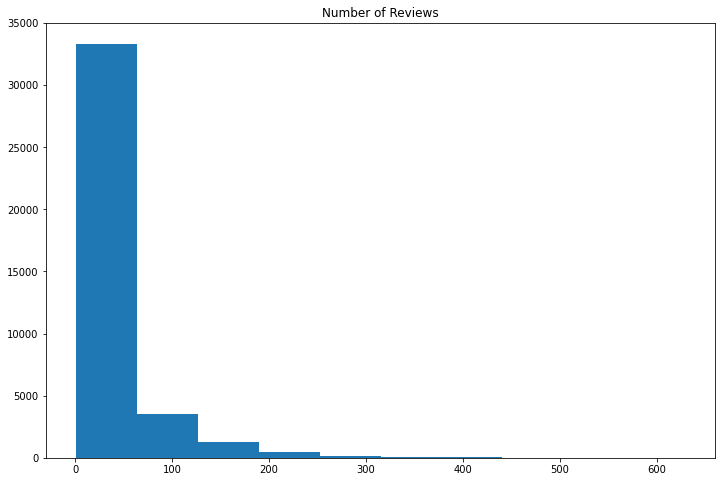

In [4]:
plt.figure(figsize = (12, 8))

plt.hist(airbnb_data["number_of_reviews"])

plt.title("Number of Reviews")

plt.show()

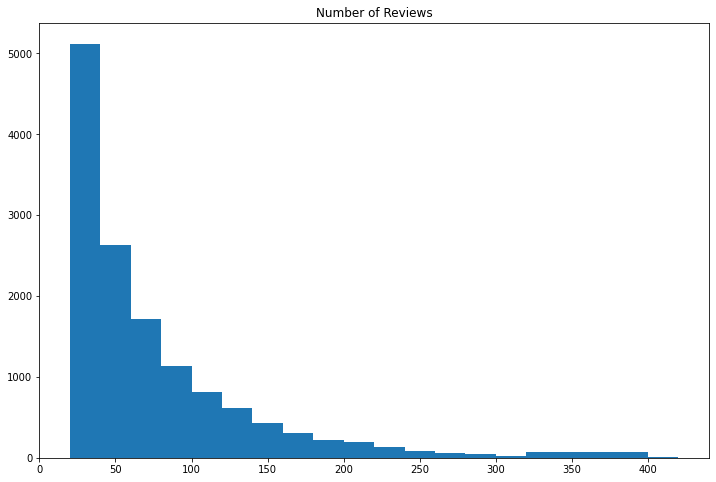

In [5]:
bins = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 400, 420]

plt.figure(figsize = (12, 8))

plt.hist(airbnb_data["number_of_reviews"], bins = bins)

plt.title("Number of Reviews")

plt.show()

### The KDE curve is the probabability density estimate of this data

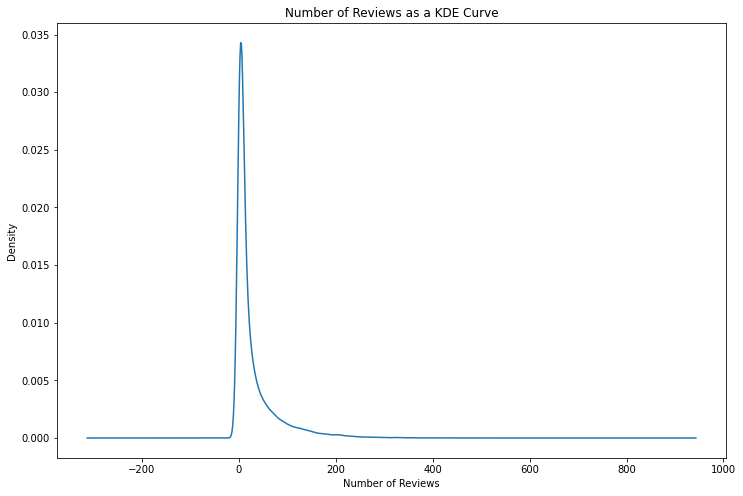

In [6]:
airbnb_data["number_of_reviews"].plot.kde(figsize = (12, 8))

plt.title("Number of Reviews as a KDE Curve")
plt.xlabel("Number of Reviews")

plt.show()

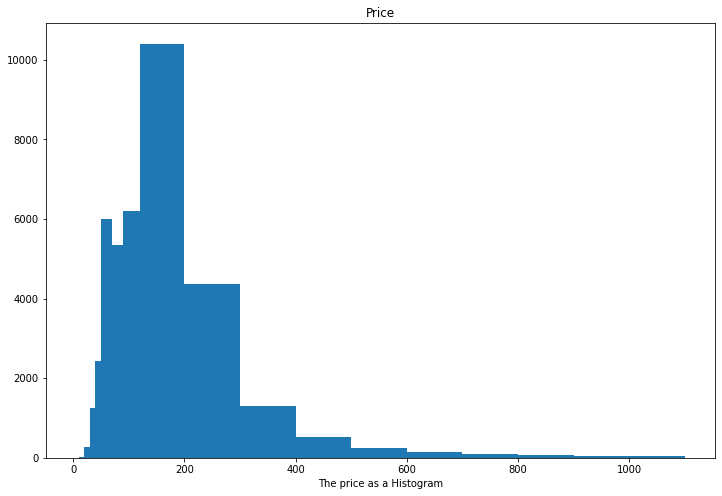

In [7]:
plt.figure(figsize = (12, 8))

bins = [5, 10, 15, 20, 30, 40, 50, 70, 90, 120, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100]

plt.hist(airbnb_data["price"], bins = bins)

plt.xlabel("The price as a Histogram")
plt.title("Price")

plt.show()

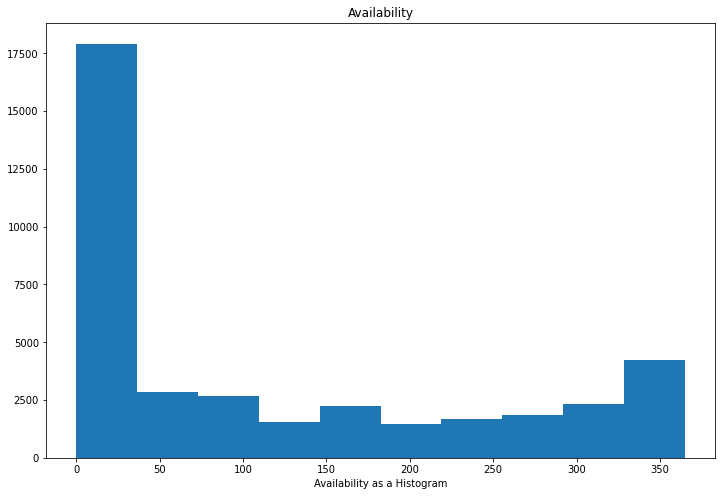

In [8]:
plt.figure(figsize = (12, 8))

plt.hist(airbnb_data["availability_365"])

plt.xlabel("Availability as a Histogram")
plt.title("Availability")

plt.show()

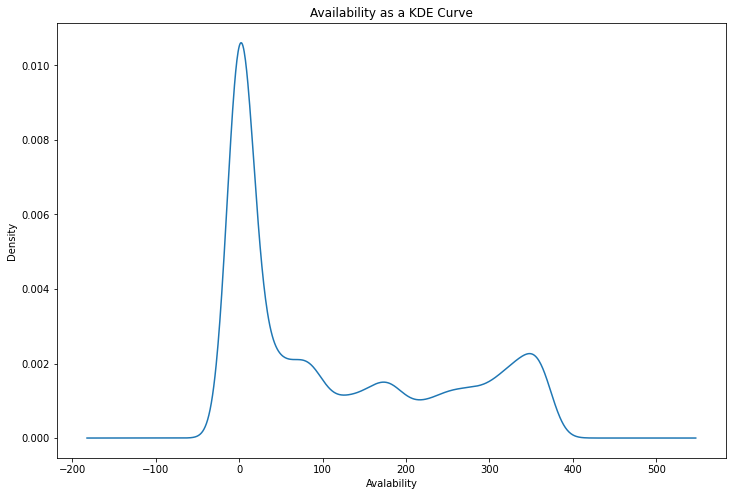

In [9]:
airbnb_data["availability_365"].plot.kde(figsize = (12, 8))

plt.title("Availability as a KDE Curve")
plt.xlabel("Avalability")

plt.show()

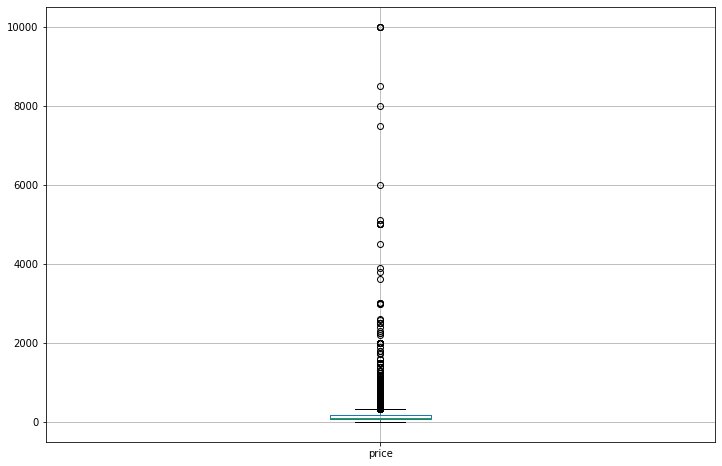

In [54]:
airbnb_data[["price"]].boxplot(figsize = (12,8))

plt.show()

### The boxplot is the best visualization for a quick overview of summary statistics for the data
- median
- quartiles
- the interquartile range. 

The points that lie outside the whiskers are considered outliers

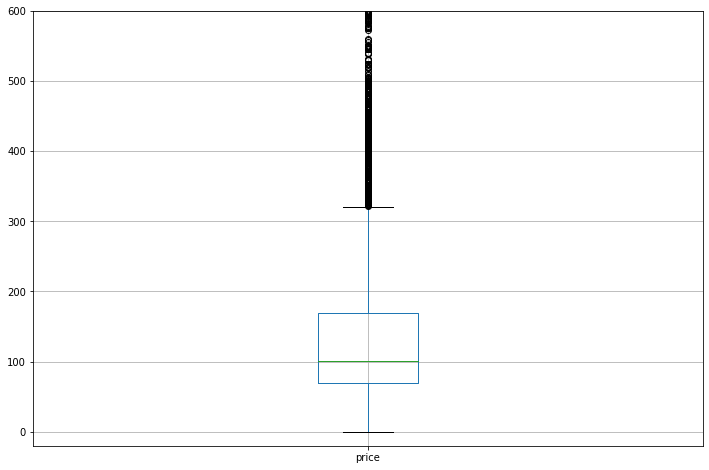

In [75]:
airbnb_data[["price"]].boxplot(figsize = (12,8))

plt.ylim(-20, 600)

plt.show()

In [76]:
neighbourhood_group_data = airbnb_data[["neighbourhood_group", "host_id"]]

neighbourhood_group_data.head(5)

,neighbourhood_group,host_id
0,Brooklyn,2787
1,Manhattan,2845
2,Brooklyn,4869
3,Manhattan,7192
4,Manhattan,7322


### Get a count of how many listings are present in each neighborhood using the group by and count aggregations

In [70]:
grouped_neighbourhood_group_data = \
    neighbourhood_group_data.groupby("neighbourhood_group", as_index = False).count()

grouped_neighbourhood_group_data.head(5)

,neighbourhood_group,host_id
0,Bronx,876
1,Brooklyn,16447
2,Manhattan,16632
3,Queens,4574
4,Staten Island,314


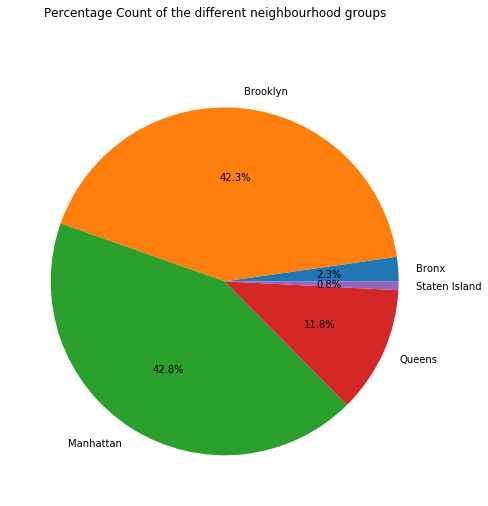

In [52]:
plt.figure(figsize = (10, 8))

plt.pie(grouped_neighbourhood_group_data["host_id"],
        labels = grouped_neighbourhood_group_data["neighbourhood_group"], autopct='%1.1f%%')

plt.suptitle("Percentage Count of the different neighbourhood groups")

plt.show()

In [61]:
room_type_data = airbnb_data[["room_type", "host_id"]]

room_type_data.head(5)

,room_type,host_id
0,Private room,2787
1,Entire home/apt,2845
2,Entire home/apt,4869
3,Entire home/apt,7192
4,Entire home/apt,7322


### Group based on the kind of accommodation that is available 

In [77]:
grouped_room_type_data = room_type_data.groupby("room_type", as_index = False).count()

grouped_room_type_data.head(5)

,room_type,host_id
0,Entire home/apt,20332
1,Private room,17665
2,Shared room,846


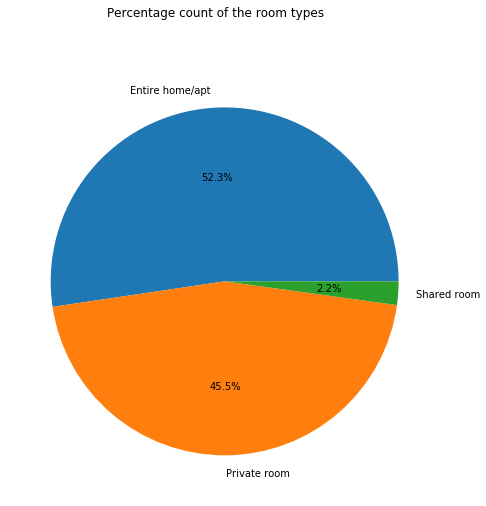

In [78]:
plt.figure(figsize = (10, 8))

plt.pie(grouped_room_type_data["host_id"],
        labels = grouped_room_type_data["room_type"], autopct='%1.1f%%')

plt.suptitle("Percentage count of the room types")

plt.show()

### Use the "explode" parameter in a pie chart to highlight a particular section of the pie

In [73]:
explode_min = (0, 0, 0.2)

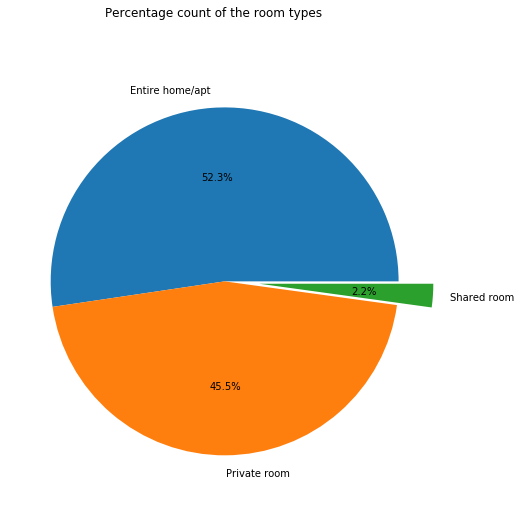

In [74]:
fig, (ax1) = plt.subplots(1, figsize = (12, 8))

wedges, texts, autotexts = ax1.pie(grouped_room_type_data["host_id"], 
                                   labels = grouped_room_type_data["room_type"],
                                   autopct = "%1.1f%%",
                                   explode = explode_min)

plt.suptitle("Percentage count of the room types")

plt.show()